## 1. Import Data & Check Data
## 2. Pick Out Variables
## 3. Create a correlation matrix heatmap
## 4. Create Segment for 'age_category'
## 5. create scatterplot and histogram
## 6. Explanation of heat map and scatterplots
## 7. Pairplot & Explanation of Correlation
## 8. Step 7 - Questions, Additional Insights, and Hypotheses. 

## 1. Import Data & Check Data

In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
#define path
path = r'C:\Users\ajkap\Final Achievement'

In [6]:
#import 'insurance_clean.csv' 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = False)

In [7]:
#check data
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,insurance_charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#remove unamed column
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
#recheck data
df.head()

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Pick Out Variables

In [10]:
# Create a correlation matrix
df.corr()

C:\Users\ajkap\AppData\Local\Temp\ipykernel_22984\2601685253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,insurance_charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
insurance_charges,0.298308,0.198401,0.067389,1.000000


In [11]:
#check columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'insurance_charges'],
      dtype='object')

In [12]:
df.select_dtypes("number")

,age,bmi,children,insurance_charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1332,50,30.970,3,10600.54830
1333,18,31.920,0,2205.98080
1334,18,36.850,0,1629.83350
1335,21,25.800,0,2007.94500


In [13]:
#create a subset including age, bmi, children, insurance_charges
df_sub = df[['age', 'bmi', 'children', 'insurance_charges', 'smoker']]

In [14]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\ajkap\\Final Achievement\\03 Scripts'

## Step 3. Create a correlation matrix heatmap

C:\Users\ajkap\AppData\Local\Temp\ipykernel_22984\4064890671.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_1=sns.heatmap(df_sub.corr(), annot = True, ax = ax)


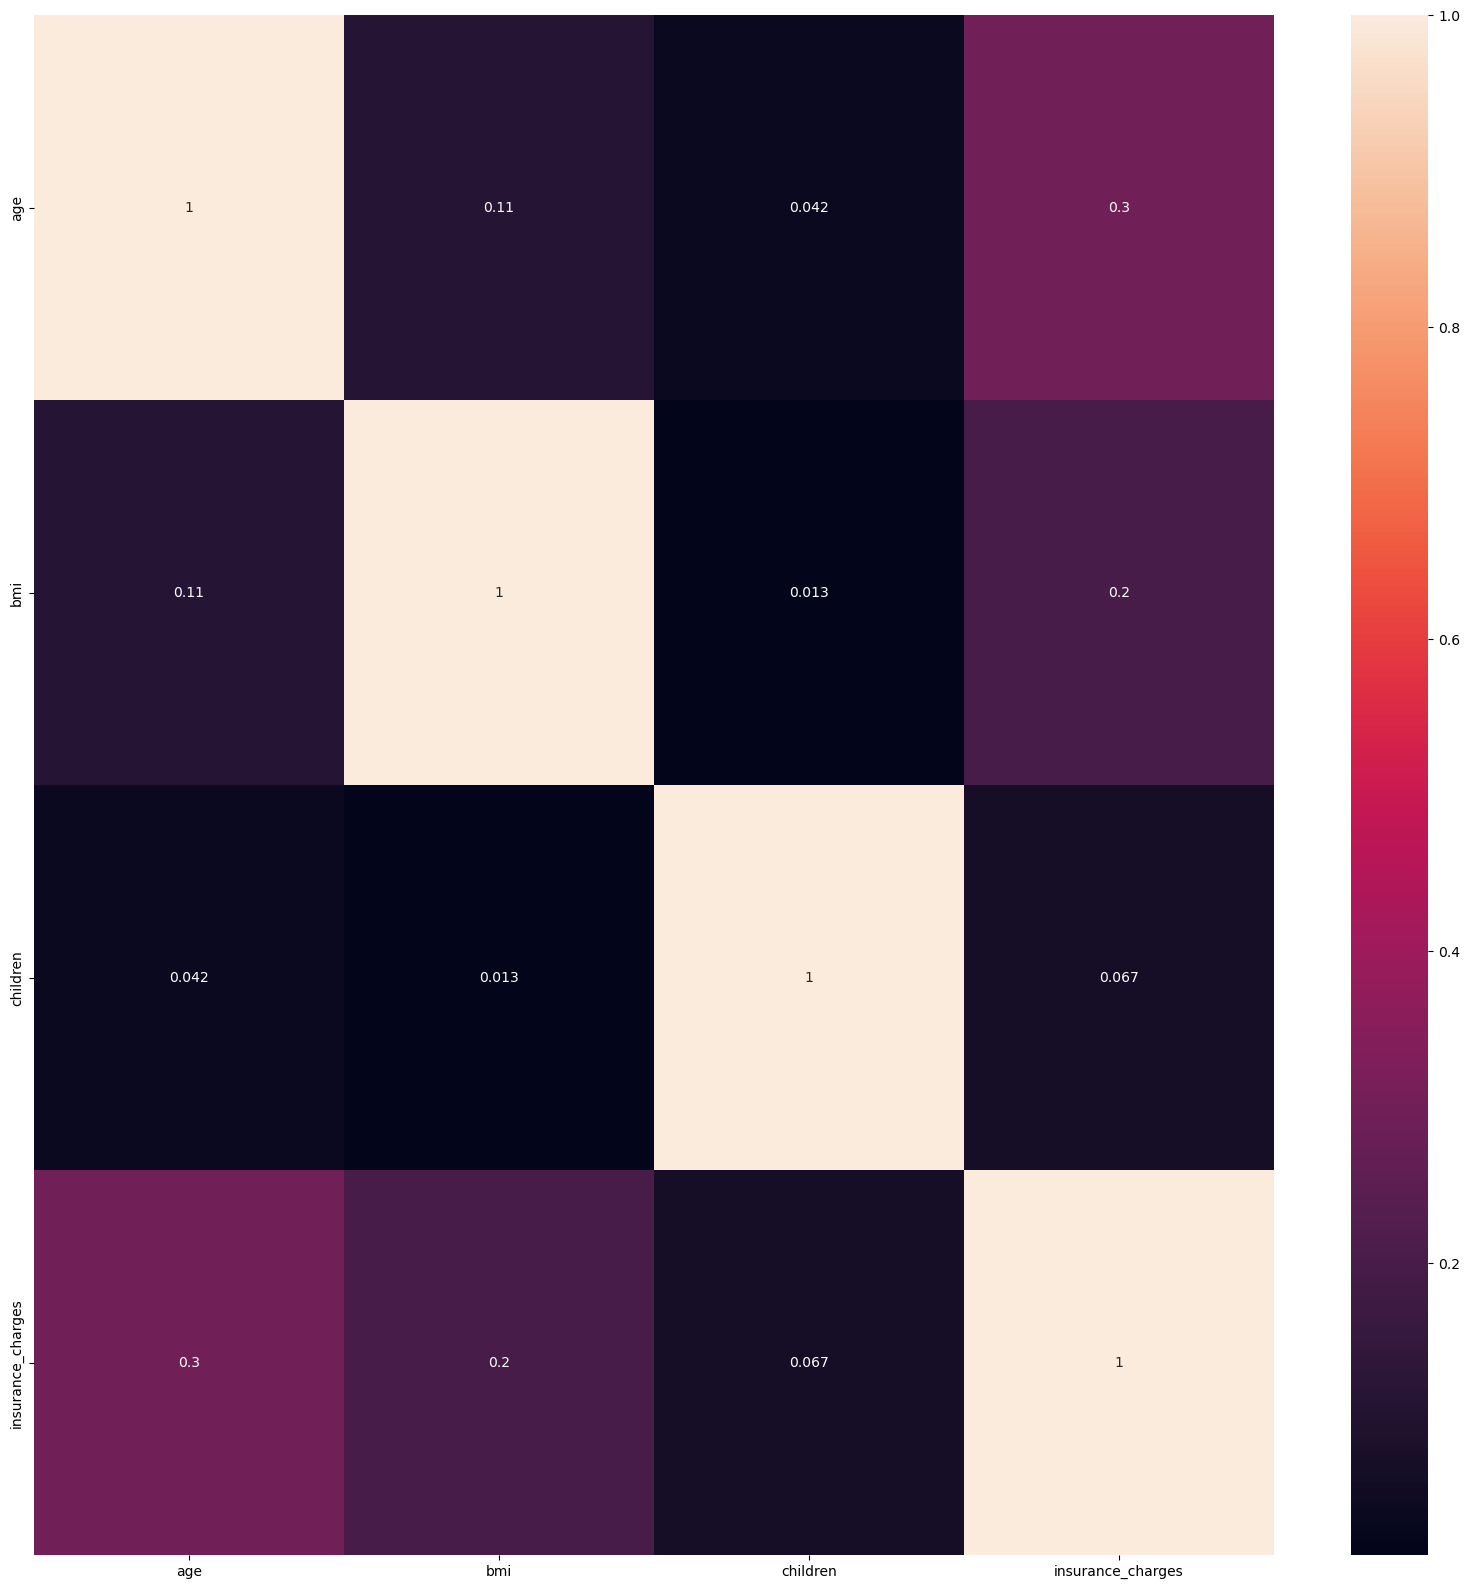

In [15]:
# Create the correlation heatmap with subset
f,ax = plt.subplots(figsize=(20,20))

corr_1=sns.heatmap(df_sub.corr(), annot = True, ax = ax)

In [16]:
# Export correlation heatmap
corr_1.figure.savefig(os.path.join(path, '04 Analysis', 'correlation_heatmap.png'))

# 4. Create Segment for 'age_category'

In [13]:
# Create segment for younger aged
df.loc[df['age'] < 30, 'age_category'] = 'younger_aged'

In [14]:
#Create segment for middle aged
df.loc[(df['age'] >=30) & (df['age'] < 55), 'age_category']= 'middle_aged'

In [15]:
#create segment for older aged
df.loc[df['age'] >= 55, 'age_category'] = 'upper_aged'

In [16]:
#check new segments
df['age_category'].value_counts(dropna = False)

middle_aged     679
younger_aged    416
upper_aged      242
Name: age_category, dtype: int64

## 5. create scatterplot and histogram

<Axes: xlabel='age', ylabel='Count'>

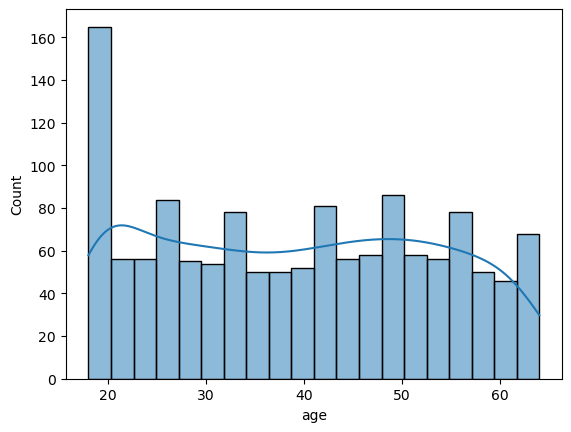

In [17]:
# create a histogram for insurance age
sns.histplot(df['age'], bins = 20, kde = True)

<Axes: xlabel='insurance_charges', ylabel='Count'>

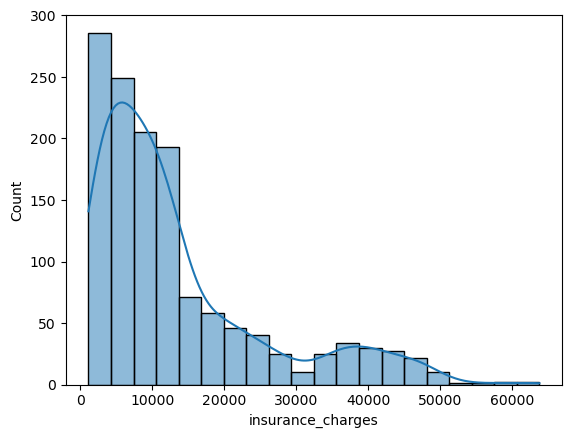

In [18]:
# create a histogram for insurance charges
sns.histplot(df['insurance_charges'], bins = 20, kde = True)

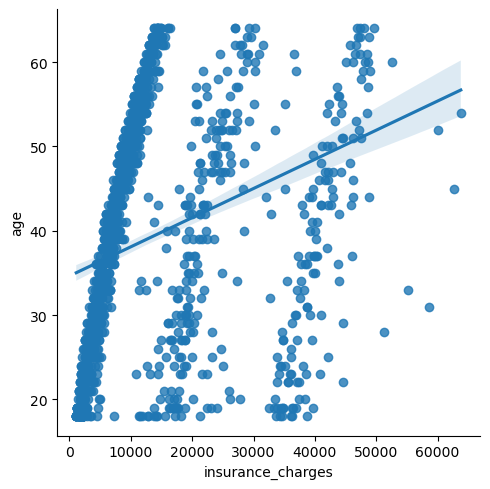

In [27]:
#create scatter plot of insurance_charges and age
scatter_1=sns.lmplot(x = 'insurance_charges', y = 'age', data = df_sub)

In [28]:
#export scatterplot
scatter_1.figure.savefig(os.path.join(path, '04 Analysis','scatterplot.png'))

## 6 Explanation of heat map and scatterplots
### Looking at the heat map and scatterplots, the only variables with even a moderately strong relationship are 'insurance_charges' and 'age'. This may make sense because as someone smokes and gets older, they tend to have more medical issues which could raise their insurance charges. The other variables that seem to show a positive correlation are age and bmi. This also makes sense since people with a higher bmi tend to have more health issues and could be at risk for other conditions such as diabetes and heart issues. These all could raise the insurance charges for these patients. 

## 7. Pairplot & Explanation of Correlation

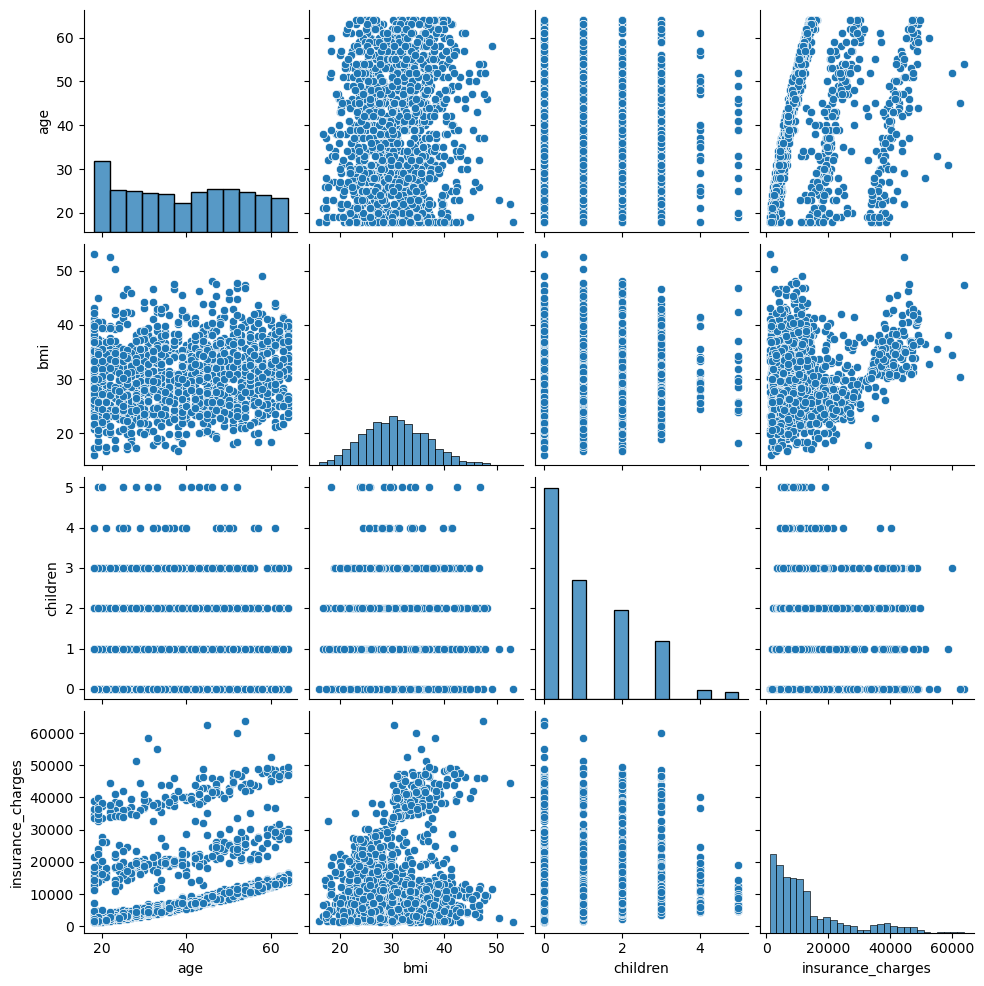

In [18]:
#create a pair plot of the entire dataset
g = sns.pairplot(df_sub)

In [19]:
# Export pairplot
g.figure.savefig(os.path.join(path, '04 Analysis', 'pairplot.png'))

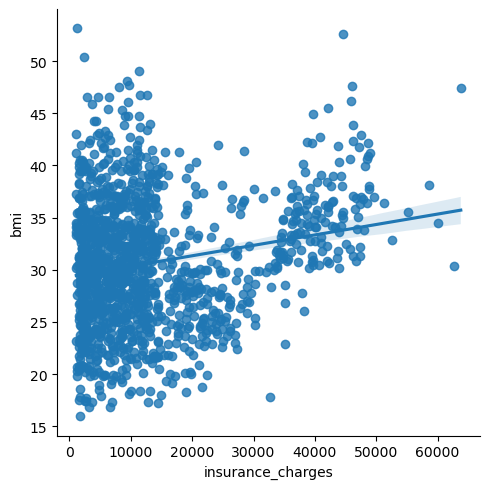

In [29]:
#create scatter plot of bmi and insurance_charges

scatter_2=sns.lmplot(x = 'insurance_charges', y = 'bmi', data = df_sub)

In [30]:
# Export scatterplot
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','scatterplot2.png'))

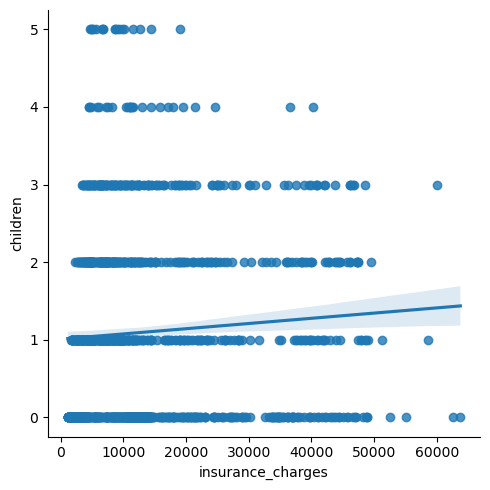

In [31]:
#create scatter plot of children and insurance_charges

sns.lmplot(x = 'insurance_charges', y = 'children', data = df_sub)

## The variables for the most part do not seem to have much correlation. The only exceptions are with age and insurance charges and bmi and insurance charges. I would like to explore these two variables more since there seems to be a positive correlation between them. They also have the strongest correlation of all the variables in the pair plot. Age and bmi seem to have a little bit of a relationship but it isn't strong since the heat map had the correlation at only 0.11

## 8. Step 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

## Questions to Explore: 
1.Do the number of children one has affect if a person has higher insurance charges?
### There does not seem to be a connection based on this analysis. The correlation coeffecient was very low.
3 What year was the most expensive for insurance charges?
### Do not have the answer to this question yet
4.Which age is a patient likely to have the most insurance charges 
### This question could not be determined based on this analysis but I would like to explore this in future analyses.
5.	Does age increase someone’s risk of dying from heart attack? 
### there does seem to be some correlation of a person's age and their risk of having higher insurance charges. 
6.Is there are connection between heart disease and how sedentary they are?
### there does not seem to be a connection as of right now. It would be interesting to explore this in a time series analysis to see if that generates any connection
7.Which continents have the highest rates of heart disease related deaths and which ones have the lowest?
### do not have enough information to answer this question yet
8.Which region has the highest number of insurance charges?
### This question will be better answered in a map analysis.

## Additional insights

### There does not seem to be much difference in insurance charges between the age of 20 and 30. There maybe a slight increase but nothing too significant. 
### There does not seem to be any correlation between insurance charges and the number of children someone has.

## New Questions

### Do people in Southeast have a higher insurance charges than people in other regions?
### Does a smoker have higher insurance charges than a nonsmoker?
### Does a male or female tend to have higher insurance charges?

## Hypthoses

### A person in the upped aged group is more likely to have higher insurance charges than someone in a younger aged group.
### People living in Northeast have a lower insurance charges than people living in the other regions. 
### People who smoke will have higher insurance charges than people who do not smoke.
### The higher a person's bmi is, the higher their insurance charges are.